# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd
import numpy

dataset = pd.read_excel("data.xlsx")

dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Getting the inputs and output

In [2]:
dataset.iloc[:, :-1].head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [3]:
X = dataset.iloc[:, :-1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [4]:
y = dataset.iloc[:, -1].values

In [5]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

### Creating the Training Set and the Test Set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train

array([[  11.22,   43.13, 1017.24,   80.9 ],
       [  13.67,   54.3 , 1015.92,   75.42],
       [  32.84,   77.95, 1014.68,   45.8 ],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [8]:
X_test

array([[  28.66,   77.95, 1009.56,   69.07],
       [  17.48,   49.39, 1021.51,   84.53],
       [  14.86,   43.14, 1019.21,   99.14],
       ...,
       [  12.24,   44.92, 1023.74,   88.21],
       [  27.28,   47.93, 1003.46,   59.22],
       [  17.28,   39.99, 1007.09,   74.25]])

In [9]:
y_train

array([473.93, 467.87, 431.97, ..., 459.01, 462.72, 428.12])

In [10]:
y_test

array([431.23, 460.01, 461.14, ..., 473.26, 438.  , 463.28])

## Part 2 - Building and training the model

### Building the model

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [12]:
model.fit(X_train, y_train)

LinearRegression()

### Inference

Making the predictions of the data points in the test set

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

In [15]:
model.predict([[15,40, 1000, 75]])

array([465.80771895])

## Part 3: Evaluating the model

### R-Squared

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2 = r2_score(y_test, y_pred)

In [18]:
r2

0.9325315554761303

### Adjusted R-Squared

##### Using the formular for Adjusted $R^2$
$
R^{2} = 1 - (1 - R^{2}) * \frac{n-1}{n - k - 1}
$

Where:
      
   **k** = number of independent variables

   **n** = sample size

In [19]:
k = X_test.shape[1]
n = X_test.shape[0]

In [20]:
k

4

In [21]:
n

1914

$
Adj R^{2} = 1 - (1 - R^{2}) * \frac{1914-1}{1914 - 4 - 1}
$


In [22]:
adj_r2 = 1 - (1 - r2) * ((1914 - 1) /(1914 - 4 - 1))

In [23]:
adj_r2

0.9323901862890714

## Exercise 2

## Part 1 - Data Preprocessing

### Importing the libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Importing the dataset

In [25]:
# Change into the file location for the data

dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
# Shape

dataset.shape

(30, 2)

In [27]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [28]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [29]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Splitting the dataset into Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=0)

In [58]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [59]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [60]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [61]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

## Part 2 - Building and training the model

### Building the model

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [63]:
model.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results (Inference)

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

## Part 3: Evaluating the model

### R-Squared

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2 = r2_score(y_test, y_pred)

In [80]:
r2

0.988169515729126

### Adjusted R-Squared

##### Using the formular for Adjusted $R^2$
$
R^{2} = 1 - (1 - R^{2}) * \frac{n-1}{n - k - 1}
$

Where:
      
   **k** = number of independent variables

   **n** = sample size

In [82]:
k = X_test.shape[1]
n = X_test.shape[0]

In [83]:
k

1

In [84]:
n

6

$
Adj R^{2} = 1 - (1 - R^{2}) * \frac{6-1}{6 - 1 - 1}
$


In [87]:
adj_r2 = 1 - (1 - r2) * ((6 - 1) /(6 - 1 - 1))

In [88]:
adj_r2

0.9852118946614076

#### Making predictions when given the "Years of Experience"

In [68]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [75]:
# Predict YearsExperience = 6.5

model.predict([[6.5]])

array([87311.83747437])

In [72]:
# Predict YearsExperience = 6.8

model.predict([[6.8]])

array([90105.61001239])

In [76]:
# Predict YearsExperience = 8.7

model.predict([[8.7]])

array([107799.50275317])

In [100]:
# Predict YearsExperience = 1.5

model.predict([[1.5]])

array([40748.96184072])

**Important note:** Notice that the value of the feature (8.7 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 8.7 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

### Visualizing the Test set results against the Predicted result

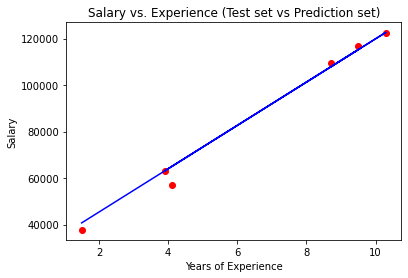

In [98]:
# plot the test
plt.scatter(X_test, y_test, color = 'red')

# plot the predictions
plt.plot(X_test, y_pred, color = 'blue')

plt.title('Salary vs. Experience (Test set vs Prediction set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Getting the final linear regression equation with the values of the coefficients

In [102]:
print(model.coef_)
print(model.intercept_)

[9312.57512673]
26780.099150628186


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our model object. Attributes in Python are different than methods and usually return a simple value or an array of values.